In [2]:
#IMPORT LIB
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read in the data pands
df = pd.read_csv(r'C:\Users\eki\Desktop\movies1.csv',on_bad_lines='skip')



In [7]:
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [8]:
# let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col ,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
#data types for our col 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
df = df.dropna(subset=['budget'])  # Remove rows with NaN or inf in the 'budget' column
df['budget'] = df['budget'].astype('int64')

In [12]:
#data types for our col 
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
df = df.dropna(subset=['gross'])  # Remove rows with NaN or inf in the 'budget' column
df['gross'] = df['gross'].astype('int64')

In [14]:
#data types for our col 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [28]:
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [10]:
#correct the year 
df = df.dropna(subset=['released'])

#str.split(',') : mean after , begin
#str[1].str[:5] begin the first caracter and extract 5-1=4 caracter
df['yearcorrect']=df['released'].astype(str).str.split(',').str[1].str[:5]
# Now let's take a look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime yearcorrect  
0   46998772.0        Warner Bros.    146.0        1980  
1   58853106.0   Columbia Pictures    104.0        1980  
2  538375067.0           Lucasfilm    124.0        1980  
3   83453539.0  Paramount Pictures     88.0        1980  
4   39846344.0      Orion Pictures     98.0        1980

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [9]:
row_count = len(df)  # Using the len() function

print("Number of rows:", row_count)

Number of rows: 7668


In [34]:
#This function allows you to arrange the rows of your DataFrame in a specific order based on the values in the specified columns.
#inplace=False leaving the original DataFrame unchanged.
# ascending=False which means you want to sort in descending order (from highest to lowest). 
#If set to True,in ascending order. If set to False, in descending order.

df.sort_values(by='gross', inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [32]:
#u can see and display all rows 
pd.set_option('display.max_rows',None)

In [8]:
#drop any dup in conmany column
#column are sorted in descending order (ascending=False), which means they will be sorted from Z to A (assuming the values are strings)
df['company']=df['company'].drop_duplicates().sort_values(ascending=False)

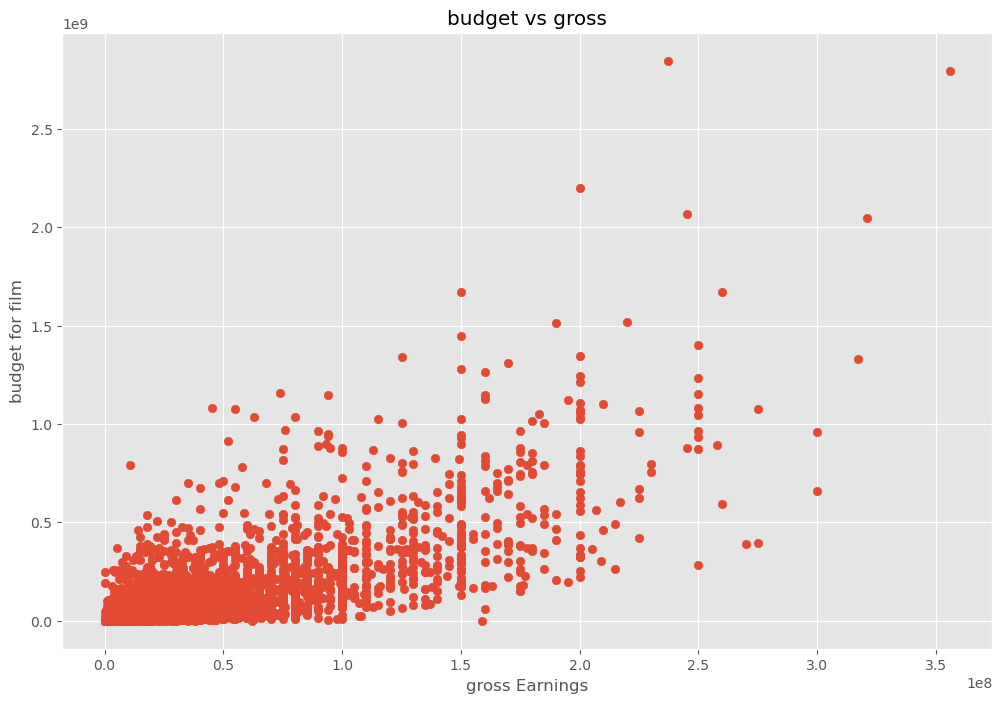

In [42]:
#create scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])

#more information 
plt.title('budget vs gross')
plt.xlabel('gross Earnings')
plt.ylabel('budget for film')
plt.show()

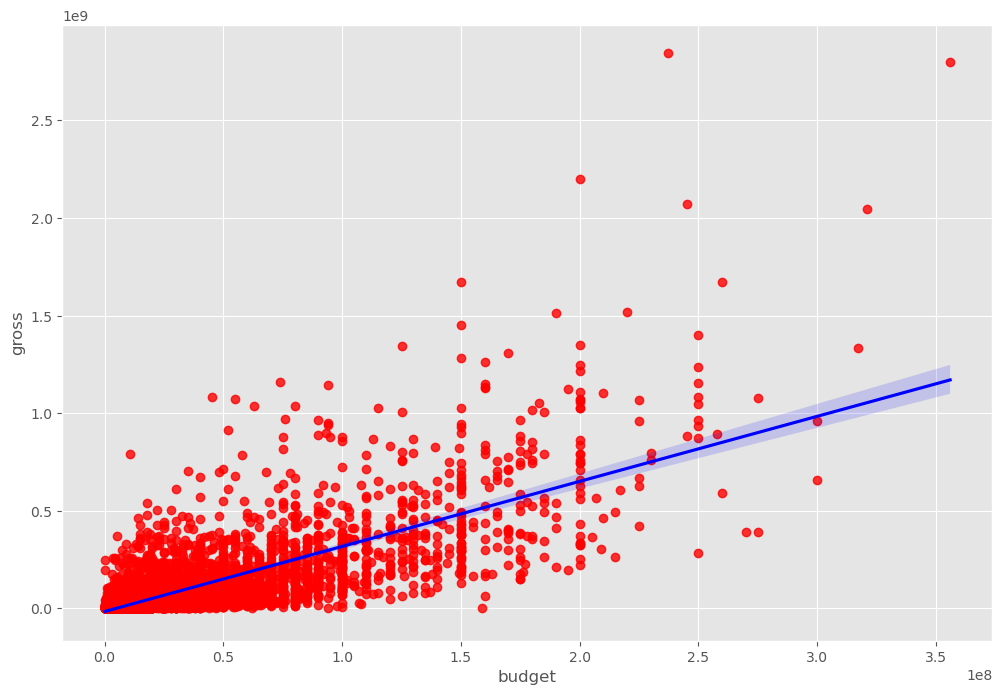

In [13]:
#plot buget vs gross using seaborn 
#sns.regplot(x='budget',y='gross',data=df, scatter-kws{"color":"red"},line-kws{"color": "blue"})

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.show()

In [7]:
# start looking at correlation
#correlation coefficient ranges from -1 to 1, where:

#1 indicates a perfect positive correlation (as one variable increases, the other also increases proportionally).
#-1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
#0 indicates no correlation (there is no linear relationship between the variables).
#3ala9a bin les attrubu mtaaak 
df.corr(method='pearson', numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

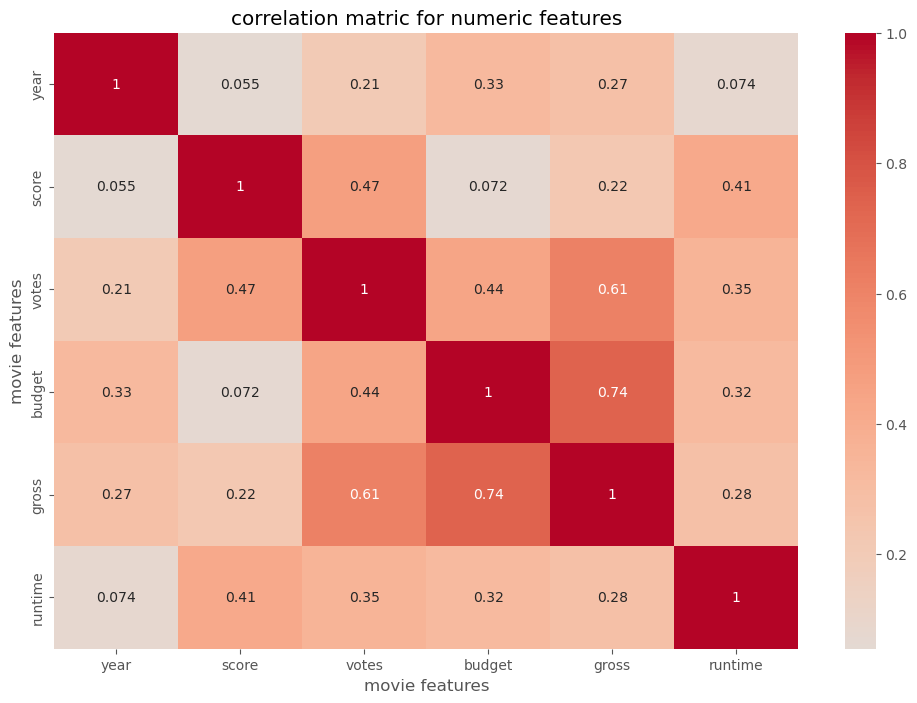

In [14]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [18]:
#make yr data s numerized 
#it's converted to a categorical type and then the category codes are 
#assigned. The resulting df_numerized DataFrame will have the
#categorical columns replaced with their corresponding numerical
#category codes

df_numerized=df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name     rating  genre  year  \
0                                        The Shining          R      6  1980   
1                                    The Blue Lagoon          R      1  1980   
2     Star Wars: Episode V - The Empire Strikes Back         PG      0  1980   
3                                          Airplane!         PG      4  1980   
4                                         Caddyshack          R      4  1980   
...                                              ...        ...    ...   ...   
7648                               Bad Boys for Life          R      0  2020   
7649                              Sonic the Hedgehog         PG      0  2020   
7650                                        Dolittle         PG      1  2020   
7651                            The Call of the Wild         PG      1  2020   
7652                               The Eight Hundred  Not Rated      0  2020   

      released  score      votes  director  writer  star  country     budget  \
0         1308    8.4   927000.0      1800    2841   700       46   19000000   
1         1131    5.8    65000.0      1581    1160   215       47    4500000   
2         1363    8.7  1200000.0       759    1822  1161       47   18000000   
3         1131    7.7   221000.0       891    1416  1478       47    3500000   
4         1174    7.3   108000.0       721     352   272       47    6000000   
...        ...    ...        ...       ...     ...   ...      ...        ...   
7648       907    6.6   140000.0        17    2397  1819       47   90000000   
7649       715    6.5   102000.0       854    2316   148       47   85000000   
7650       907    5.6    53000.0      1814    2836  1474       47  175000000   
7651       760    6.8    42000.0       296    2096   641        6  135000000   
7652       371    6.8     3700.0       748    1186  1846        8   80000000   

          gross  company  runtime  yearcorrect  
0      46998772     1283    146.0            0  
1      58853106      410    104.0            0  
2     538375067      851    124.0            0  
3      83453539     1003     88.0            0  
4      39846344      979     98.0            0  
...         ...      ...      ...          ...  
7648  426505244       -1    124.0           40  
7649  319715683       -1     99.0           40  
7650  245487753       -1    101.0           40  
7651  111105497       12    100.0           40  
7652  461421559      209    149.0           40  

[5436 rows x 16 columns]

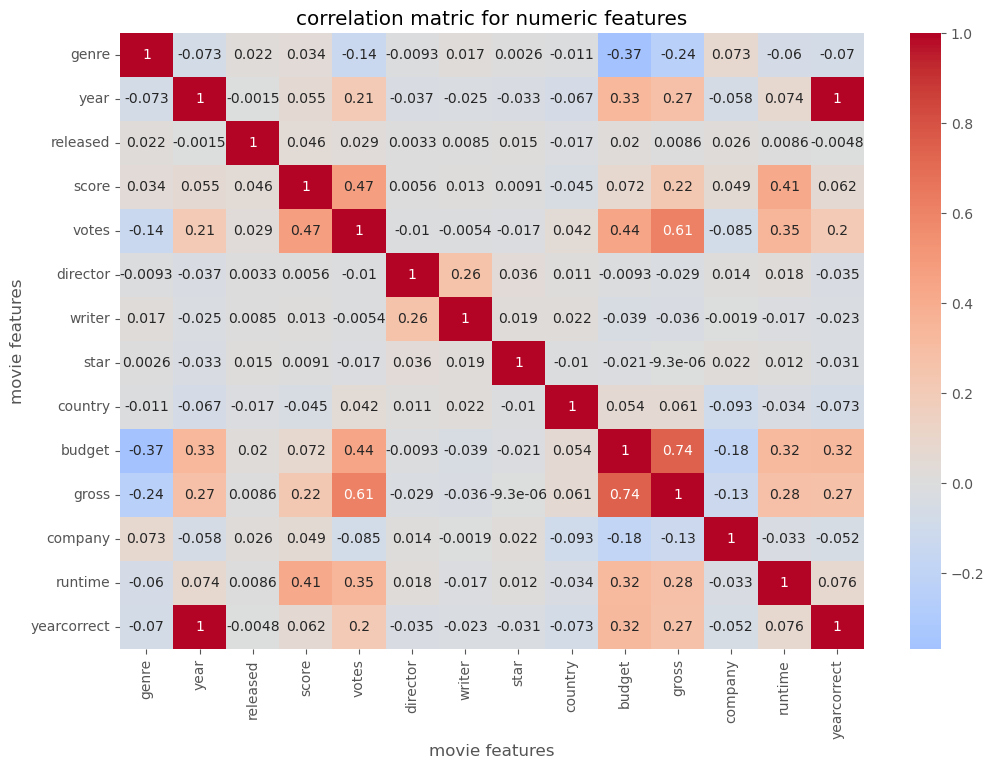

In [19]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [1]:

correlation_mat = df_numerized.corr(numeric_only=True)
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

NameError: name 'df_numerized' is not defined

In [30]:
#high_corr = sorted_corr_pairs[sorted_corr_pairs > 0.5]

#print(high_corr)
high_corr = sorted_corr_pairs[sorted_corr_pairs > 0.5]
print(high_corr)

NameError: name 'sorted_corr_pairs' is not defined

In [31]:
#u can see and display all rows 
pd.set_option('display.max_rows',None)
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
             gross         -0.244380
gross        genre         -0.244380
budget       company       -0.177975
company      budget        -0.177975
votes        genre         -0.136457
genre        votes         -0.136457
gross        company       -0.131225
company      gross         -0.131225
country      company       -0.093005
company      country       -0.093005
votes        company       -0.085330
company      votes         -0.085330
year         genre         -0.073026
genre        year          -0.073026
country      yearcorrect   -0.072580
yearcorrect  country       -0.072580
             genre         -0.070389
genre        yearcorrect   -0.070389
country      year          -0.066662
year         country       -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
company      year          -0.058334
year         company       -0.058334
yearcorrect  company       -0.052319
c

In [33]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.996642
yearcorrect  year           0.996642
genre        genre          1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64